### Questions to pursue:
#### These are initial questions from working through notebooks 1 and 2 and first viewing the data. I am most curious about change over time.
- What day of the week has the most transactions? Is there a consistent difference across the year between how much is ordered on, for example, Mondays versus Fridays?
- Does the time of month affect what is ordered? For example, do merchants purchase less at the end of the month?
- Is the top category of items sold consistent between buyers? Or, do merchants differentiate in the categroies of products they produce?
- What is the most commonly ordered category and subcategory? Does this change throughout the year?
- Which category is the most expensive? Does price have a correlation with the frequency it is ordered?
- Has the company increased or decreased or had constant sales over the year?
- Are there any new merchants? Have any merchants stopped purchasing from this company?
- Have the prices for products increased or decreased throughout the year? If so, what category of product, or what single product has the greatest change in price?
- Do the same items have different prices for different merchants? Do shipping costs need to be factored in?

#### From these questions, the I will look into changes in prices. Throughout the months that data was taken, did prices change? If so, what categories and how much change?

To set up, import packages and read in csv file. 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filename = 'new_baskets_full.csv'
baskets = pd.read_csv(filename)

First, I will look at the range of prices. 

In [3]:
baskets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336472 entries, 0 to 336471
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           336472 non-null  int64  
 1   order_id     336472 non-null  int64  
 2   placed_at    336472 non-null  object 
 3   merchant_id  336472 non-null  int64  
 4   sku_id       336472 non-null  int64  
 5   top_cat_id   336461 non-null  float64
 6   sub_cat_id   336461 non-null  float64
 7   qty          336472 non-null  int64  
 8   price        336472 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 23.1+ MB


In [4]:
baskets.dropna(inplace=True)

In [5]:
baskets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336461 entries, 0 to 336471
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           336461 non-null  int64  
 1   order_id     336461 non-null  int64  
 2   placed_at    336461 non-null  object 
 3   merchant_id  336461 non-null  int64  
 4   sku_id       336461 non-null  int64  
 5   top_cat_id   336461 non-null  float64
 6   sub_cat_id   336461 non-null  float64
 7   qty          336461 non-null  int64  
 8   price        336461 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 25.7+ MB


In [6]:
baskets['price'].describe()

count    3.364610e+05
mean     1.378965e+05
std      1.744712e+05
min      4.375000e-02
25%      4.600000e+04
50%      1.070000e+05
75%      1.845000e+05
max      5.875000e+07
Name: price, dtype: float64

[With the full dataset, I notice: 
- the mean is very close to the original
- the minimum is no longer 0
- the maximum is even an order of magnitude greater than the maximum of the smaller dataset. This is likely another error.]

Next, I would like to see the prices of individual skus. I will start by finding the sku with the highest price, and use sku_id to find if there is more than one unique price for this id. 

Another question to consider is what is the most common sku, and what is the variety of prices for that product?

In [7]:
baskets['price'].sort_values(ascending=False).reset_index()

,index,price
0,78536,5.875000e+07
1,67262,2.301000e+07
2,66551,2.301000e+07
3,310185,1.055000e+07
4,5392,3.825000e+06
...,...,...
336456,1791,1.000000e+00
336457,263457,7.920000e-01
336458,263206,7.500000e-01
336459,262925,5.580000e-02


[with full data: There are now numerous very high prices, and very low prices, but no prices at zero]

I know that the highest price is 2175000.0, so instead I will filter for that price to find the sku_id.

[with full data: the highest price is now 5.875000e+07, so below I investigate this SKU instead, especially since the sku_ids have likely changed with the full dataset. These cells have been edited to acommodate the new data.]

In [8]:
baskets[baskets['price'] == 58750000]


,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price
78536,78641,10750,2021-11-06 09:53:53.181,1103,301,11.0,27.0,1,58750000.0


The sku_id is 301, so now I will filter for sku_id.

In [9]:
baskets[baskets['sku_id'] == 301]

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price
917,914,83,2021-06-17 10:27:52.447,302,301,11.0,27.0,50,23250.0
1451,1784,129,2021-06-24 12:43:03.065,22,301,11.0,27.0,50,22000.0
1515,1514,135,2021-06-24 23:31:59.247,114,301,11.0,27.0,10,22000.0
1529,1528,136,2021-06-24 23:58:49.239,114,301,11.0,27.0,50,24500.0
1571,1570,137,2021-06-25 00:01:29.306,109,301,11.0,27.0,50,24500.0
...,...,...,...,...,...,...,...,...,...
335546,335629,61825,2022-08-13 23:23:58.111,665,301,11.0,27.0,10,25500.0
336143,336225,62017,2022-08-15 14:37:01.641,146,301,11.0,27.0,50,25500.0
336211,336249,61920,2022-08-15 15:15:51.713,441,301,11.0,27.0,150,25500.0
336255,336310,61998,2022-08-15 16:51:02.716,1770,301,11.0,27.0,50,25500.0


I am surprised to see a variety of prices, and wonder if the highest price might be an error. Another potential question might be to look into this order and merchant to see if there is anything else that appears out of place.

The rest of the prices for this item seem to be in a closer range. Next, I will look to see a summary of prices for the sku 301. 

In [10]:
baskets[baskets['sku_id'] == 301].describe()

,id,order_id,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price
count,552.000000,552.000000,552.000000,552.0,552.0,552.0,552.000000,5.520000e+02
mean,100329.271739,16280.606884,583.489130,301.0,11.0,27.0,63.177536,1.357541e+05
std,109395.625350,20802.904991,479.452747,0.0,0.0,0.0,61.041009,2.500660e+06
min,914.000000,83.000000,7.000000,301.0,11.0,27.0,1.000000,2.200000e+04
25%,29887.750000,3082.000000,222.500000,301.0,11.0,27.0,50.000000,2.425000e+04
50%,55875.500000,7055.500000,449.000000,301.0,11.0,27.0,50.000000,2.425000e+04
75%,91889.000000,13039.500000,803.500000,301.0,11.0,27.0,50.000000,2.500000e+04
max,336419.000000,62017.000000,2121.000000,301.0,11.0,27.0,985.000000,5.875000e+07


The maximum price appears to be an outlier for this sku's prices, as it is 3 orders of magnitude beyond any other price. 

Next, I would like to look at the most common sku's fluxuation in pricing. 

In [11]:
baskets.groupby(by=['sku_id']).sum().qty.sort_values(ascending = False).reset_index()

,sku_id,qty
0,277,4803103
1,238,3602844
2,390,451559
3,1300,374089
4,1179,244959
...,...,...
1610,1227,3
1611,147,3
1612,1073,3
1613,70,3


The most common sku_id is 277.

I will check to see how many unique prices there are in the 4803103 orders. 

In [12]:
baskets[baskets['sku_id'] == 277].price.nunique()

9

In [13]:
baskets[baskets['sku_id'] == 277]

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price
1141,1128,105,2021-06-20 20:44:29.688,38,277,15.0,49.0,1,134000.0
2528,2474,189,2021-06-28 11:21:51.502,319,277,15.0,49.0,1,134000.0
3346,3345,238,2021-06-30 00:54:54.168,109,277,15.0,49.0,2,134000.0
3610,3617,265,2021-07-01 10:24:40.458,302,277,15.0,49.0,1,134000.0
4416,4430,354,2021-07-07 14:36:40.934,302,277,15.0,49.0,1,134000.0
...,...,...,...,...,...,...,...,...,...
333129,333253,61487,2022-08-08 19:05:31.388,107,277,15.0,49.0,1,135500.0
333321,333414,60836,2022-08-09 08:00:30.011,690,277,15.0,49.0,1,135500.0
333506,333858,61556,2022-08-09 11:20:08.322,18,277,15.0,49.0,1,135500.0
334282,334474,61530,2022-08-11 08:08:24.305,337,277,15.0,49.0,1,135500.0


In [14]:
baskets[baskets['sku_id'] == 277].describe()

,id,order_id,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price
count,440.000000,440.000000,440.000000,440.0,440.0,440.0,4.400000e+02,440.000000
mean,149800.711364,25554.743182,634.540909,277.0,15.0,49.0,1.091614e+04,132417.172627
std,87417.174804,16974.223046,435.952363,0.0,0.0,0.0,2.288307e+05,9210.448444
min,1128.000000,105.000000,15.000000,277.0,15.0,49.0,1.000000e+00,0.055800
25%,79317.750000,10841.000000,325.000000,277.0,15.0,49.0,1.000000e+00,132000.000000
50%,150960.500000,24975.500000,497.000000,277.0,15.0,49.0,1.000000e+00,132000.000000
75%,217514.500000,39374.750000,891.000000,277.0,15.0,49.0,2.000000e+00,134000.000000
max,336258.000000,62017.000000,2045.000000,277.0,15.0,49.0,4.800000e+06,135500.000000


The miniumum value is very low. This would be interesting to look into, which merchants have very small prices? Is there a trend to these errors? Are they errors?

Quantity of items ordered as compared to amount of time items are ordered would be another interesting question to pursue. 

Instead of organizing by quanitity, I will try to organize by frequency, as in NB03.

In [15]:
baskets['sku_id'].value_counts()

327     7500
522     6919
390     6409
438     5589
523     4804
        ... 
121        3
1451       3
1457       3
1461       3
1204       3
Name: sku_id, Length: 1615, dtype: int64

SKU 327 is the most ordered item. I check for the number of unique prices of this SKU. 

In [16]:
baskets[baskets['sku_id'] == 327].price.nunique()

52

For continuation: 
- What are these prices? What is the range and mean?
- Is there a pattern to the different prices? Do the prices change by time of year, or maybe by merchant?
- Are there trends beyond just this single item? Do prices as a whole change over time? 

A Note: There will likely be differences at Ramadan, in May/June, potentially a significant drop or spike in prices. 

In [17]:
baskets[baskets['sku_id'] == 327].price.sort_values(ascending = True).reset_index(drop=True)

0        66500.0
1       114000.0
2       114000.0
3       114000.0
4       114300.0
          ...   
7495    135500.0
7496    139000.0
7497    215500.0
7498    390000.0
7499    520000.0
Name: price, Length: 7500, dtype: float64

Here I can see 8/52 different prices. It is noteworthy that there are some prices where there is only one purchase that cost that price. I will plot the frequency of the prices.

<AxesSubplot:>

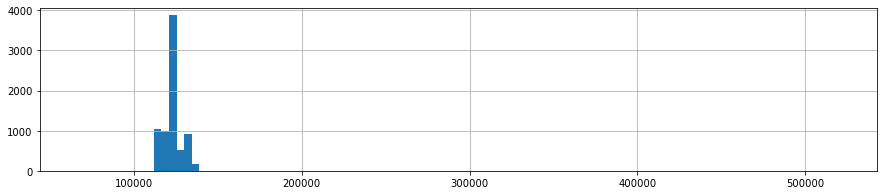

In [18]:
plt.figure(figsize=(15,3)) 
baskets[baskets['sku_id'] == 327].price.sort_values(ascending = False).reset_index(drop=True).hist(bins=100)

The distribution could be interpreted as normal. The graph is very wide. Am I able to trim the edges of the graph in order to be more zoomed in.

I will next look to see the description of this data set.

In [19]:
baskets[baskets['sku_id'] == 327].describe()

,id,order_id,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price
count,7500.000000,7500.000000,7500.000000,7500.0,7500.0,7500.0,7500.000000,7500.000000
mean,168571.441600,29209.634400,844.856933,327.0,13.0,32.0,7.942800,122996.308000
std,99473.980223,19333.097286,552.805622,0.0,0.0,0.0,32.568109,7854.349932
min,958.000000,1.000000,2.000000,327.0,13.0,32.0,1.000000,66500.000000
25%,69830.250000,9082.750000,413.000000,327.0,13.0,32.0,1.000000,118000.000000
50%,176378.500000,30356.500000,665.000000,327.0,13.0,32.0,2.000000,122000.000000
75%,249164.000000,45475.500000,1262.000000,327.0,13.0,32.0,5.000000,124500.000000
max,336428.000000,62045.000000,2135.000000,327.0,13.0,32.0,1000.000000,520000.000000


I would like to graph the change of price of this SKU over time, to see if there are trends. If there are trends, a next step could be to see if there are similar trends in the category.

<AxesSubplot:xlabel='placed_at'>

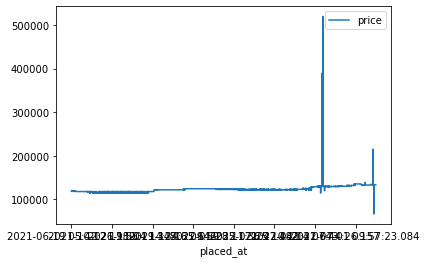

In [20]:
baskets[baskets['sku_id'] == 327].plot(x = 'placed_at', y = 'price')

This graph needs to be tidier, but it is interesting to see that price for this SKU has continually risen over the time that the data has been recorded. Next, I will make a tidier graph.

The code below, from NB03, separates place_at into date, year, month, day, hour, and weekday.

In [21]:
baskets['datetime'] = baskets['placed_at'].apply(lambda x: datetime.fromisoformat(x))

baskets['date'] = baskets['datetime'].dt.date
baskets['year'] = baskets['datetime'].dt.year
baskets['month'] = baskets['datetime'].dt.month
baskets['day'] = baskets['datetime'].dt.day
baskets['hour'] = baskets['datetime'].dt.hour
baskets['weekday'] = baskets['datetime'].dt.weekday
baskets.head(3)

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,day,hour,weekday
0,1,2,2021-04-09 16:19:27.998,46,101,3.0,94.0,400,134000.0,2021-04-09 16:19:27.998,2021-04-09,2021,4,9,16,4
1,2,2,2021-04-09 16:19:27.998,46,100,3.0,94.0,400,137000.0,2021-04-09 16:19:27.998,2021-04-09,2021,4,9,16,4
2,3,2,2021-04-09 16:19:27.998,46,102,3.0,94.0,400,169000.0,2021-04-09 16:19:27.998,2021-04-09,2021,4,9,16,4


<AxesSubplot:xlabel='date'>

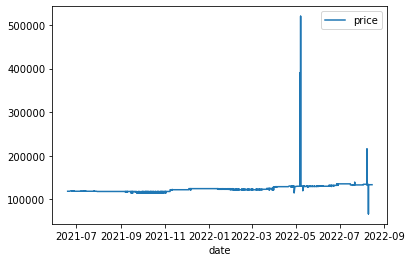

In [22]:
baskets[baskets['sku_id'] == 327].plot(x = 'date', y = 'price')

I will plot the price over time of the top SKUs, but on separate graphs.

In [25]:
baskets['sku_id'].value_counts().head(10)

327    7500
522    6919
390    6409
438    5589
523    4804
263    4548
185    4463
521    4462
276    3718
184    3480
Name: sku_id, dtype: int64

<AxesSubplot:xlabel='date'>

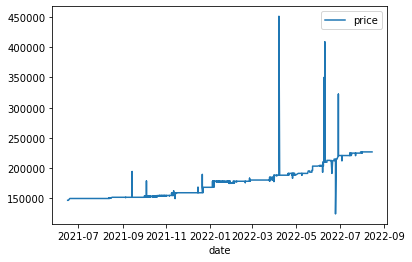

In [26]:
baskets[baskets['sku_id'] == 522].plot(x = 'date', y = 'price')

<AxesSubplot:xlabel='date'>

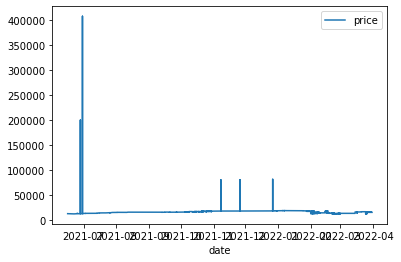

In [27]:
baskets[baskets['sku_id'] == 390].plot(x = 'date', y = 'price')

<AxesSubplot:xlabel='date'>

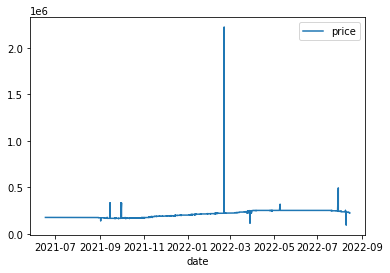

In [28]:
baskets[baskets['sku_id'] == 438].plot(x = 'date', y = 'price')

<AxesSubplot:xlabel='date'>

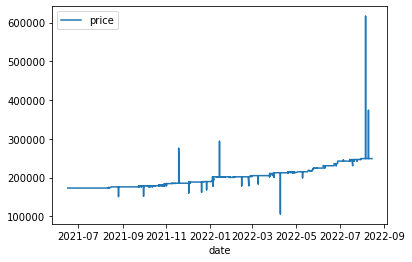

In [29]:
baskets[baskets['sku_id'] == 523].plot(x = 'date', y = 'price')

<AxesSubplot:xlabel='date'>

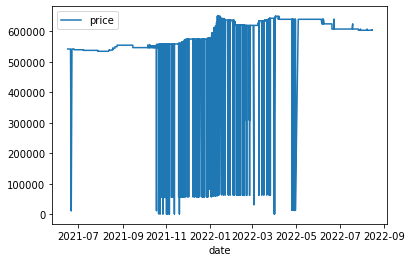

In [30]:
baskets[baskets['sku_id'] == 263].plot(x = 'date', y = 'price')

The fluxuation of this plot is interesting. Why are there consistently so many low prices?

<AxesSubplot:xlabel='date'>

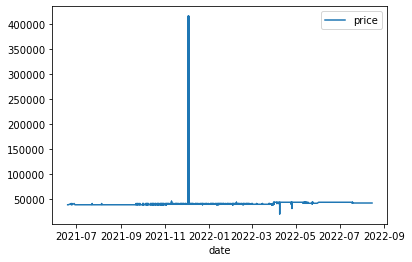

In [31]:
baskets[baskets['sku_id'] == 185].plot(x = 'date', y = 'price')

<AxesSubplot:xlabel='date'>

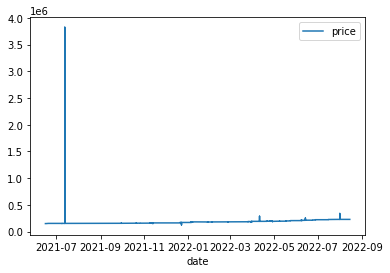

In [32]:
baskets[baskets['sku_id'] == 521].plot(x = 'date', y = 'price')

<AxesSubplot:xlabel='date'>

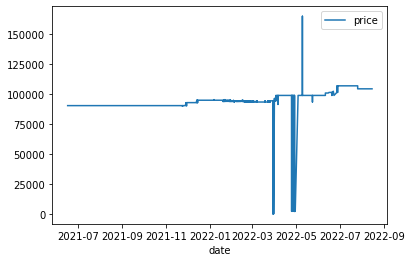

In [33]:
baskets[baskets['sku_id'] == 276].plot(x = 'date', y = 'price')

I am noticing that these charts have a general upward trend, but the amount of change differs between them. Additionally, each plot has several points that do not follow the trend. How can these be accounted for? Is there a way to measure the amount of change throughout the 12 months? Maybe the average change between orders? Can I create a new variable that is the change in price from last purchase of this SKU?

Based on discussion in work session, I am looking for similarity between vectors that measure trends in price of different SKUs. The challenge here is to create vectors of the same length so they can be compared by cosine. I hope to take the average price paid for an sku for each day. 

In [95]:
SKU_baskets = baskets.groupby(['sku_id', 'date']).agg({'price':'mean'}).reset_index()

This creates dataset with the average prices of SKUs each day. 

This needs to be rerun with each drop.

In [96]:
SKU_baskets

,sku_id,date,price
0,1,2021-06-15,336000.000000
1,1,2021-06-26,322500.000000
2,1,2021-06-28,322500.000000
3,1,2021-07-21,350000.000000
4,2,2021-05-11,179000.000000
...,...,...,...
111901,1616,2022-08-11,142666.666667
111902,1616,2022-08-12,144000.000000
111903,1616,2022-08-13,144000.000000
111904,1616,2022-08-14,144000.000000


In [97]:
baskets[(baskets['price'] >140000) & (baskets['sku_id'] == 327)]

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,day,hour,weekday,spent


This finds SKU 327 of price greater than 140000.

In [37]:
baskets.drop(baskets[(baskets['price'] >140000) & (baskets['sku_id'] == 327)].index,inplace=True)

This drops the ids above.

In [38]:
baskets[(baskets['price'] < 100000) & (baskets['sku_id'] == 327)]

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,day,hour,weekday
334071,330043,60778,2022-08-10 15:43:22.635,2121,327,13.0,32.0,10,66500.0,2022-08-10 15:43:22.635,2022-08-10,2022,8,10,15,2


In [39]:
baskets.drop(baskets[(baskets['price'] < 100000) & (baskets['sku_id'] == 327)].index, inplace = True)

The above cells drop the lowest price.

<AxesSubplot:xlabel='date'>

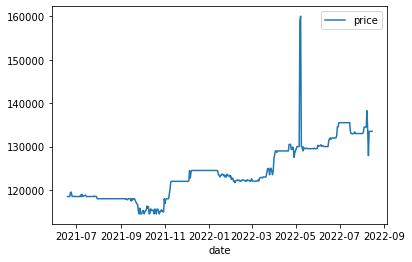

In [40]:
SKU_baskets[SKU_baskets['sku_id'] == 327].plot(x = 'date', y = 'price')

<AxesSubplot:xlabel='date'>

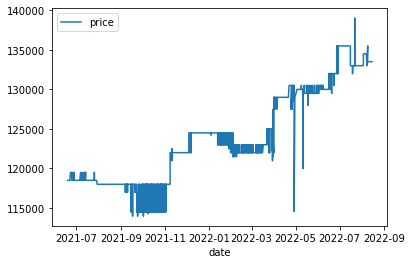

In [41]:
baskets[baskets['sku_id'] == 327].plot(x = 'date', y = 'price')

The two above plots are the graphed average price by day, followed by a graph of all prices. I will do the same for the next most common SKU.

They do have an upward projection overall, but with small peaks and valleys.

These graphs suggest that even within individual days, there are different prices. There may be some trends throughout the week as well as overall. 

I may need to group by week, or even month, as there are several stretches without any purchases.
I will use this same graphing of average prices per day method on the next most common SKUs and compare.

In [42]:
baskets[(baskets['price'] >250000) & (baskets['sku_id'] == 522)]

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,day,hour,weekday
267718,267878,49483,2022-04-07 22:45:18.321,1915,522,3.0,94.0,2,451250.0,2022-04-07 22:45:18.321,2022-04-07,2022,4,7,22,3
301823,299977,54901,2022-06-09 10:03:19.310,1232,522,3.0,94.0,3,350000.0,2022-06-09 10:03:19.310,2022-06-09,2022,6,9,10,3
302256,300743,54881,2022-06-10 13:53:16.056,1361,522,3.0,94.0,1,409000.0,2022-06-10 13:53:16.056,2022-06-10,2022,6,10,13,4
313073,311568,56834,2022-06-29 11:10:26.929,66,522,3.0,94.0,4,322500.0,2022-06-29 11:10:26.929,2022-06-29,2022,6,29,11,2


In [43]:
baskets.drop(baskets[(baskets['price'] >250000) & (baskets['sku_id'] == 522)].index,inplace=True)

The cells above drop the outanding high prices of SKU 522.

In [98]:
baskets[(baskets['price'] < 140000) & (baskets['sku_id'] == 522)]

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,day,hour,weekday,spent


In [45]:
baskets.drop(baskets[(baskets['price'] < 140000) & (baskets['sku_id'] == 522)].index,inplace=True)

<AxesSubplot:xlabel='date'>

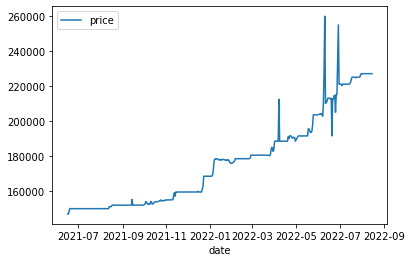

In [46]:
SKU_baskets[SKU_baskets['sku_id'] == 522].plot(x = 'date', y = 'price')

<AxesSubplot:xlabel='date'>

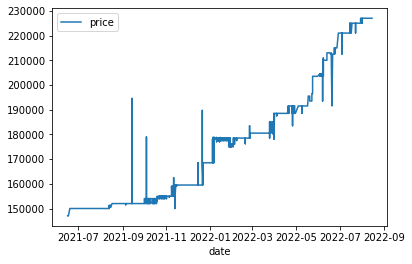

In [47]:
baskets[baskets['sku_id'] == 522].plot(x = 'date', y = 'price')

These graphs also make it seem like there are ranges of prices on similar days, as the graph with each individual price has less smooth progression.

I have put the first graphs from SKU 327 below. The most interesting sections are those with the wider range of orders in a short time, the most notable in these graphs being in September and October.

<AxesSubplot:xlabel='date'>

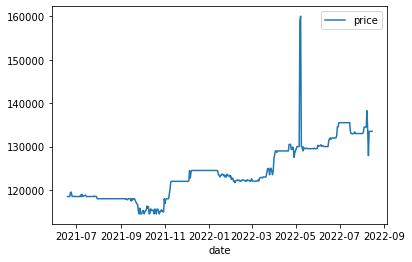

In [48]:
SKU_baskets[SKU_baskets['sku_id'] == 327].plot(x = 'date', y = 'price')

<AxesSubplot:xlabel='date'>

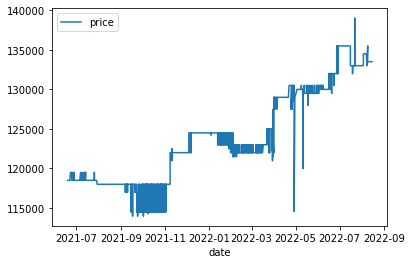

In [49]:
baskets[baskets['sku_id'] == 327].plot(x = 'date', y = 'price')

<AxesSubplot:xlabel='date'>

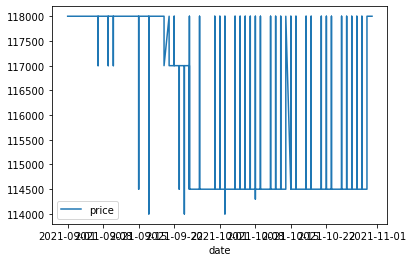

In [50]:
baskets[(baskets['sku_id'] == 327) & ((baskets['month'] == 9) |(baskets['month'] == 10))].plot(x = 'date', y = 'price')

15,000 = 1 dollar, so about a dollar's increase for SKU 327 over the year. 

dividing everything by 150, it would be equivalent to cents. The changes of the above graph is relatively insignificant. At the same time, why are the changes in price made?

Thinking of methods of anomaly detection:
Many of the graphs above require this removal or repairing of data.
A way to continue is to look at different anomalies and solutions.
- removing vs repairing vs imputing 
- solutions for anomalies

Below, I look at SKU 263, where the graph that is the least clean of the graphs run above. 

<AxesSubplot:xlabel='date'>

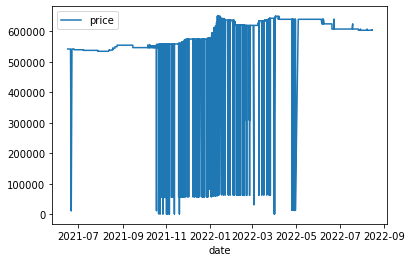

In [51]:
baskets[baskets['sku_id'] == 263].plot(x = 'date', y = 'price')

In [52]:
baskets[baskets['sku_id'] == 263].describe()

,id,order_id,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,year,month,day,hour,weekday
count,4548.000000,4548.000000,4548.000000,4548.0,4548.0,4548.0,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000
mean,148846.138962,25235.666227,730.091029,263.0,4.0,21.0,7.285840,568506.881424,2021.423043,7.530783,15.685796,12.606201,2.538039
std,95151.672154,18478.694457,499.153045,0.0,0.0,0.0,42.716877,103016.520533,0.494096,3.912972,8.680280,3.917045,1.805011
min,853.000000,62.000000,1.000000,263.0,4.0,21.0,1.000000,1200.000000,2021.000000,1.000000,1.000000,0.000000,0.000000
25%,70011.250000,9100.250000,343.000000,263.0,4.0,21.0,1.000000,557500.000000,2021.000000,4.000000,8.000000,10.000000,1.000000
50%,136824.500000,21928.500000,650.000000,263.0,4.0,21.0,1.000000,575000.000000,2021.000000,9.000000,15.000000,12.000000,2.000000
75%,217963.500000,39368.250000,1062.000000,263.0,4.0,21.0,2.000000,620000.000000,2022.000000,11.000000,23.000000,15.000000,4.000000
max,336470.000000,62035.000000,2127.000000,263.0,4.0,21.0,1500.000000,650000.000000,2022.000000,12.000000,31.000000,23.000000,6.000000


In [53]:
baskets[baskets['sku_id'] == 263].price.describe()

count      4548.000000
mean     568506.881424
std      103016.520533
min        1200.000000
25%      557500.000000
50%      575000.000000
75%      620000.000000
max      650000.000000
Name: price, dtype: float64

<AxesSubplot:>

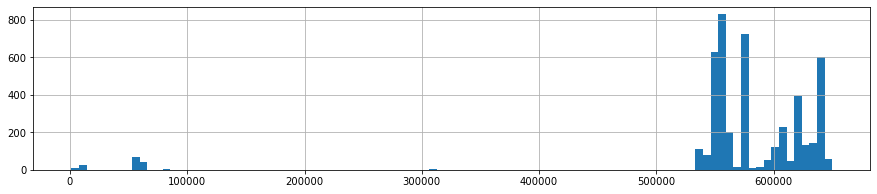

In [54]:
plt.figure(figsize=(15,3)) 
baskets[baskets['sku_id'] == 263].price.sort_values(ascending = False).reset_index(drop=True).hist(bins=100)

There are a number of very low prices, below 100000, while the rest are between 500000 and 700000.

I list the prices of this SKU. 

In [55]:
baskets[baskets['sku_id'] == 263].price.nunique()

77

In [56]:
baskets[baskets['sku_id'] == 263].price.sort_values(ascending = True).reset_index(drop=True)

0         1200.0
1         1200.0
2         1200.0
3         1200.0
4         1200.0
          ...   
4543    650000.0
4544    650000.0
4545    650000.0
4546    650000.0
4547    650000.0
Name: price, Length: 4548, dtype: float64

In [58]:
baskets[(baskets['sku_id'] == 263) & (baskets['price'] < 100000)]

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,day,hour,weekday
1178,1169,113,2021-06-21 22:37:22.283,362,263,4.0,21.0,50,10850.0,2021-06-21 22:37:22.283,2021-06-21,2021,6,21,22,0
47914,47940,5838,2021-10-18 09:31:40.864,1061,263,4.0,21.0,50,12000.0,2021-10-18 09:31:40.864,2021-10-18,2021,10,18,9,0
53657,53787,6703,2021-10-21 18:49:49.593,325,263,4.0,21.0,50,1200.0,2021-10-21 18:49:49.593,2021-10-21,2021,10,21,18,3
54288,54420,6810,2021-10-22 11:19:43.390,171,263,4.0,21.0,10,54700.0,2021-10-22 11:19:43.390,2021-10-22,2021,10,22,11,4
56479,56543,7141,2021-10-23 11:28:47.788,752,263,4.0,21.0,10,1200.0,2021-10-23 11:28:47.788,2021-10-23,2021,10,23,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282004,282137,51776,2022-04-30 09:11:46.817,777,263,4.0,21.0,150,13000.0,2022-04-30 09:11:46.817,2022-04-30,2022,4,30,9,5
282114,282259,51789,2022-04-30 11:35:04.457,9,263,4.0,21.0,50,13000.0,2022-04-30 11:35:04.457,2022-04-30,2022,4,30,11,5
282199,282351,51805,2022-04-30 16:13:59.187,679,263,4.0,21.0,50,13000.0,2022-04-30 16:13:59.187,2022-04-30,2022,4,30,16,5
282226,282378,51813,2022-04-30 17:15:59.367,2086,263,4.0,21.0,100,13000.0,2022-04-30 17:15:59.367,2022-04-30,2022,4,30,17,5


In [59]:
baskets[baskets['sku_id'] == 263].price.sort_values(ascending = True).reset_index(drop=True).head(100)

0      1200.0
1      1200.0
2      1200.0
3      1200.0
4      1200.0
       ...   
95    57500.0
96    57500.0
97    57500.0
98    57500.0
99    57500.0
Name: price, Length: 100, dtype: float64

In [60]:
baskets_263 = baskets[(baskets['sku_id'] == 263) & (baskets['price'] < 100000)]
baskets_263['price'].value_counts()

57500.000000    28
13000.000000    22
55900.000000    16
1200.000000     10
62200.000000     8
62000.000000     7
63750.000000     6
56100.000000     5
55250.000000     4
82642.857143     3
54700.000000     3
64250.000000     3
59600.000000     3
55750.000000     3
63500.000000     3
57250.000000     2
57850.000000     2
61250.000000     2
64000.000000     2
65000.000000     2
63100.000000     2
31000.000000     1
12850.000000     1
1255.000000      1
1270.000000      1
63800.000000     1
62750.000000     1
10850.000000     1
88857.142857     1
62500.000000     1
12000.000000     1
57000.000000     1
56500.000000     1
56000.000000     1
55800.000000     1
12636.000000     1
Name: price, dtype: int64

I am noticing some things in this new list of low prices:
- Some prices have lengthy decimals, which is surprising. 
- There is a wide spread of these prices, with many prices only listed once. 
- There are a significant number that lead with  5 and 6 however, so I suspect that for these values, a 0 was left off of the end of the price. 

I will remove these values from the list to see if there are any noticeable patterns on the smaller list. 

I also plan to graph the SKU prices without the small prices listed above. 

Why would there be so many more 'errors' for this SKU? 

I notice that there are two common very low prices, 13,000 and 1,200, and several of the other prices are close to these values.

I look at the 13,000 price to see if there are trends. 

In [63]:
baskets[(baskets['sku_id'] == 263) & (baskets['price'] == 13000)]

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,day,hour,weekday
277047,277204,51007,2022-04-25 15:36:07.310,1809,263,4.0,21.0,50,13000.0,2022-04-25 15:36:07.310,2022-04-25,2022,4,25,15,0
277125,277249,51014,2022-04-25 15:51:10.263,1100,263,4.0,21.0,50,13000.0,2022-04-25 15:51:10.263,2022-04-25,2022,4,25,15,0
277157,277281,51020,2022-04-25 15:56:28.057,2033,263,4.0,21.0,100,13000.0,2022-04-25 15:56:28.057,2022-04-25,2022,4,25,15,0
277360,277518,51055,2022-04-25 19:26:40.430,1509,263,4.0,21.0,100,13000.0,2022-04-25 19:26:40.430,2022-04-25,2022,4,25,19,0
277440,277609,51068,2022-04-25 19:54:04.453,2019,263,4.0,21.0,50,13000.0,2022-04-25 19:54:04.453,2022-04-25,2022,4,25,19,0
277582,277747,51086,2022-04-25 20:26:03.329,882,263,4.0,21.0,50,13000.0,2022-04-25 20:26:03.329,2022-04-25,2022,4,25,20,0
278345,278481,51212,2022-04-26 11:20:24.033,2068,263,4.0,21.0,250,13000.0,2022-04-26 11:20:24.033,2022-04-26,2022,4,26,11,1
279460,279593,51373,2022-04-27 09:20:16.166,2074,263,4.0,21.0,100,13000.0,2022-04-27 09:20:16.166,2022-04-27,2022,4,27,9,2
280474,280587,51501,2022-04-28 09:02:35.392,578,263,4.0,21.0,50,13000.0,2022-04-28 09:02:35.392,2022-04-28,2022,4,28,9,3
280602,280734,51523,2022-04-28 10:41:24.628,105,263,4.0,21.0,50,13000.0,2022-04-28 10:41:24.628,2022-04-28,2022,4,28,10,3


I am interested to discover that all of the orders of SKU 263 with price 13,000 are made from April 25 to April 30. Now I am curious to see when other errors are made, and if they are made during similar time frames.
I look back on previously made charts of price over time, to see if there are any similar patterns. 

Looking back at the plot of SKU 263, I note that this same discovery could have been made by looking at the plot. I wonder what the other price(s) were for SKU 263 during that time period. 

<AxesSubplot:xlabel='date'>

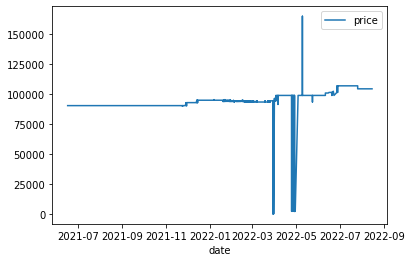

In [64]:
baskets[baskets['sku_id'] == 276].plot(x = 'date', y = 'price')

It appears as though SKU 276 has a similar outlying cluster of prices at the end of April. Maybe these SKUs are of the same category?

In [65]:
baskets[baskets['sku_id'] == 263].describe()

,id,order_id,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,year,month,day,hour,weekday
count,4548.000000,4548.000000,4548.000000,4548.0,4548.0,4548.0,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000
mean,148846.138962,25235.666227,730.091029,263.0,4.0,21.0,7.285840,568506.881424,2021.423043,7.530783,15.685796,12.606201,2.538039
std,95151.672154,18478.694457,499.153045,0.0,0.0,0.0,42.716877,103016.520533,0.494096,3.912972,8.680280,3.917045,1.805011
min,853.000000,62.000000,1.000000,263.0,4.0,21.0,1.000000,1200.000000,2021.000000,1.000000,1.000000,0.000000,0.000000
25%,70011.250000,9100.250000,343.000000,263.0,4.0,21.0,1.000000,557500.000000,2021.000000,4.000000,8.000000,10.000000,1.000000
50%,136824.500000,21928.500000,650.000000,263.0,4.0,21.0,1.000000,575000.000000,2021.000000,9.000000,15.000000,12.000000,2.000000
75%,217963.500000,39368.250000,1062.000000,263.0,4.0,21.0,2.000000,620000.000000,2022.000000,11.000000,23.000000,15.000000,4.000000
max,336470.000000,62035.000000,2127.000000,263.0,4.0,21.0,1500.000000,650000.000000,2022.000000,12.000000,31.000000,23.000000,6.000000


In [66]:
baskets[baskets['sku_id'] == 276].describe()

,id,order_id,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,year,month,day,hour,weekday
count,3718.000000,3718.000000,3718.000000,3718.0,3718.0,3718.0,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000
mean,167273.556751,28916.297203,840.370360,276.0,8.0,43.0,11.439215,93395.178187,2021.533351,6.692039,16.274072,12.514793,2.538462
std,97321.102608,18953.104147,566.649939,0.0,0.0,0.0,115.025837,9811.233017,0.498954,3.887522,8.633601,4.287323,1.843194
min,890.000000,1.000000,1.000000,276.0,8.0,43.0,1.000000,233.800000,2021.000000,1.000000,1.000000,0.000000,0.000000
25%,83180.750000,11343.250000,366.000000,276.0,8.0,43.0,1.000000,90500.000000,2021.000000,3.000000,9.000000,9.000000,1.000000
50%,170200.000000,29037.000000,664.000000,276.0,8.0,43.0,2.000000,93500.000000,2022.000000,7.000000,17.000000,12.000000,2.000000
75%,248635.000000,45373.000000,1288.750000,276.0,8.0,43.0,5.000000,95000.000000,2022.000000,11.000000,24.000000,15.000000,4.000000
max,336298.000000,62014.000000,2137.000000,276.0,8.0,43.0,4000.000000,165000.000000,2022.000000,12.000000,31.000000,23.000000,6.000000


These baskets are not of the same category. I will look into SKU 276.

In [99]:
baskets_276_outliers = baskets[(baskets['sku_id'] == 276)]
baskets_276_outliers['price'].value_counts()

90500.0     1326
93500.0      497
95000.0      451
99000.0      360
94000.0      280
93000.0      215
94500.0      215
107000.0     153
104500.0     100
101500.0      47
2363.0        18
101000.0      17
96500.0       15
2362.0         7
233.8          4
95500.0        2
2413.0         2
91500.0        2
235.3          1
90000.0        1
2412.0         1
96000.0        1
2296.0         1
165000.0       1
102500.0       1
Name: price, dtype: int64

The outstanding values almost all begin with 2. I wonder if there is another issue with multiplication. 

In [68]:
baskets[(baskets['sku_id'] == 276) & (baskets['price'] < 90000)]

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,day,hour,weekday
261049,261221,48233,2022-03-30 13:54:47.102,304,276,8.0,43.0,30,233.8,2022-03-30 13:54:47.102,2022-03-30,2022,3,30,13,2
262532,262708,48621,2022-03-31 14:43:24.689,1470,276,8.0,43.0,3200,235.3,2022-03-31 14:43:24.689,2022-03-31,2022,3,31,14,3
262679,262852,48650,2022-03-31 17:42:46.016,2043,276,8.0,43.0,4000,233.8,2022-03-31 17:42:46.016,2022-03-31,2022,3,31,17,3
263277,263375,48684,2022-03-31 22:03:54.687,1466,276,8.0,43.0,3600,233.8,2022-03-31 22:03:54.687,2022-03-31,2022,3,31,22,3
263396,263495,48687,2022-03-31 22:20:45.051,1995,276,8.0,43.0,2000,233.8,2022-03-31 22:20:45.051,2022-03-31,2022,3,31,22,3
277112,277236,51012,2022-04-25 15:48:36.505,583,276,8.0,43.0,200,2412.0,2022-04-25 15:48:36.505,2022-04-25,2022,4,25,15,0
277453,277622,51071,2022-04-25 19:58:02.120,2035,276,8.0,43.0,1000,2363.0,2022-04-25 19:58:02.120,2022-04-25,2022,4,25,19,0
277514,277697,51078,2022-04-25 20:13:15.689,1466,276,8.0,43.0,80,2363.0,2022-04-25 20:13:15.689,2022-04-25,2022,4,25,20,0
277659,277815,51103,2022-04-25 21:02:26.567,1737,276,8.0,43.0,80,2363.0,2022-04-25 21:02:26.567,2022-04-25,2022,4,25,21,0
277675,277841,51105,2022-04-25 21:17:33.438,2062,276,8.0,43.0,200,2362.0,2022-04-25 21:17:33.438,2022-04-25,2022,4,25,21,0


There was another burst of small orders. The price 2363, 2364, and several prices in the 2000 range were ordered between April 25 and 30. Several prices in the 200 range were ordered March 30 and 31. Is this a time when there were many orders? 

In [69]:
baskets['date'].value_counts().head(60)

2022-02-03    2353
2022-02-02    2298
2022-02-25    2233
2021-11-08    2200
2022-02-15    2143
2021-11-02    2143
2022-02-23    2110
2021-11-09    2088
2021-10-25    2086
2021-10-23    2083
2021-12-03    2060
2021-11-03    2059
2022-01-22    2047
2021-11-11    2026
2021-10-18    1999
2021-11-27    1985
2021-11-12    1955
2021-10-15    1924
2021-11-05    1917
2021-12-04    1914
2021-10-19    1892
2021-10-30    1891
2021-12-07    1884
2022-02-21    1874
2022-02-18    1874
2021-10-22    1859
2021-11-16    1831
2022-02-08    1825
2021-12-02    1822
2021-11-06    1820
2021-10-28    1814
2021-10-21    1813
2021-12-21    1811
2021-11-30    1809
2021-10-27    1807
2022-03-30    1803
2021-11-26    1775
2021-10-29    1750
2022-02-24    1749
2021-11-13    1744
2022-01-29    1740
2021-11-10    1734
2021-11-25    1733
2022-02-17    1718
2022-02-04    1706
2021-11-20    1688
2021-12-14    1679
2021-11-24    1673
2022-01-19    1654
2021-10-26    1650
2021-12-28    1646
2022-01-21    1644
2021-12-08  

There are not any dates May 25 through 30 in this list. 

In [70]:
baskets['date'].value_counts().tail(60)

2021-06-20    114
2021-07-17    113
2021-07-14    104
2021-08-08    100
2021-06-08     96
2021-09-01     95
2021-06-23     92
2021-07-02     89
2022-07-09     87
2021-06-14     74
2021-07-18     71
2021-05-27     69
2021-06-22     67
2021-06-17     67
2021-08-29     67
2021-06-19     66
2021-06-15     60
2021-07-04     58
2021-08-01     53
2021-06-10     46
2021-05-19     46
2021-08-22     46
2021-05-10     44
2021-07-25     42
2021-05-22     37
2021-05-20     37
2021-06-02     36
2021-05-11     36
2022-05-03     34
2021-06-18     33
2021-07-24     31
2021-06-21     29
2021-06-27     29
2021-05-24     29
2022-01-01     27
2021-05-26     26
2021-05-31     20
2021-06-03     18
2021-06-07     17
2021-05-21     16
2021-07-11     16
2021-04-15     15
2021-06-16     15
2021-04-16     14
2021-05-18     13
2021-04-17     12
2021-05-08     12
2021-05-06     11
2021-04-19      9
2021-05-17      9
2021-06-11      9
2021-04-09      8
2021-05-09      8
2021-05-05      8
2021-04-22      7
2021-06-09

The dates are also are not in the list of least ordered on dates.

Next I will plot with and without anomalies to see how the data will change and to demonstrate how significantly the anomalies change the data and possible conclusions. 

I will use SKU 263. 

<AxesSubplot:title={'center':'Price by Date of SKU 263'}, xlabel='Date', ylabel='Price(Rp)'>

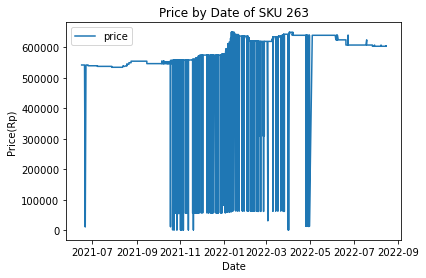

In [71]:
baskets[baskets['sku_id'] == 263].plot(x = 'date', y = 'price', title = 'Price by Date of SKU 263', xlabel = 'Date', ylabel = 'Price(Rp)')

In [72]:
baskets["spent"] = baskets["qty"] * baskets["price"]
baskets[baskets['sku_id'] == 263].head(100)

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,day,hour,weekday,spent
862,853,75,2021-06-16 10:45:59.305,95,263,4.0,21.0,200,542500.0,2021-06-16 10:45:59.305,2021-06-16,2021,6,16,10,2,108500000.0
928,929,85,2021-06-17 13:18:07.779,249,263,4.0,21.0,1,542500.0,2021-06-17 13:18:07.779,2021-06-17,2021,6,17,13,3,542500.0
973,975,97,2021-06-19 05:42:26.989,300,263,4.0,21.0,1,542500.0,2021-06-19 05:42:26.989,2021-06-19,2021,6,19,5,5,542500.0
1114,1101,105,2021-06-20 20:44:29.688,38,263,4.0,21.0,2,542500.0,2021-06-20 20:44:29.688,2021-06-20,2021,6,20,20,6,1085000.0
1178,1169,113,2021-06-21 22:37:22.283,362,263,4.0,21.0,50,10850.0,2021-06-21 22:37:22.283,2021-06-21,2021,6,21,22,0,542500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6011,5998,376,2021-07-16 10:25:12.894,354,263,4.0,21.0,1,538000.0,2021-07-16 10:25:12.894,2021-07-16,2021,7,16,10,4,538000.0
6086,6085,472,2021-07-16 23:29:14.331,400,263,4.0,21.0,1,538000.0,2021-07-16 23:29:14.331,2021-07-16,2021,7,16,23,4,538000.0
6114,6147,484,2021-07-17 09:06:43.183,360,263,4.0,21.0,10,538000.0,2021-07-17 09:06:43.183,2021-07-17,2021,7,17,9,5,5380000.0
6119,6152,514,2021-07-17 09:59:18.064,355,263,4.0,21.0,1,538000.0,2021-07-17 09:59:18.064,2021-07-17,2021,7,17,9,5,538000.0


<AxesSubplot:xlabel='date'>

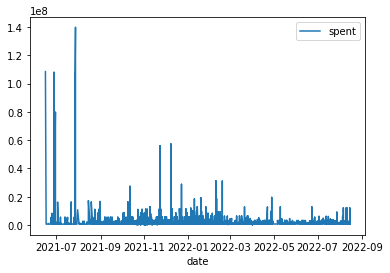

In [73]:
baskets[baskets['sku_id'] == 263].plot(x = 'date', y = 'spent')

<AxesSubplot:xlabel='date'>

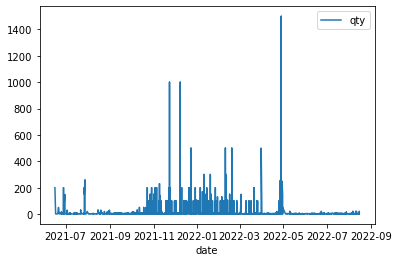

In [74]:
baskets[baskets['sku_id'] == 263].plot(x = 'date', y = 'qty')

The quanities of SKU 263 also have anomalies. 

In [75]:
baskets[baskets['sku_id']==263]['qty'].value_counts()

1       2742
2        734
5        333
3        323
4        117
100       66
6         39
10        37
200       21
7         20
50        19
20        17
8         17
150       14
15         8
500        6
30         6
105        4
300        3
250        2
130        2
1000       2
9          2
140        2
170        1
400        1
32         1
230        1
180        1
17         1
16         1
260        1
148        1
83         1
40         1
1500       1
Name: qty, dtype: int64

In [76]:
def remove_outliers(in_baskets):
    baskets = in_baskets.copy(deep=True)
    baskets_1Q = baskets.quantile(.25).price
    baskets_3Q = baskets.quantile(.75).price
    IQrange = baskets_3Q - baskets_1Q
    upper_fence = baskets_3Q + 3 * IQrange
    lower_fence = baskets_1Q - 3 * IQrange
    baskets.drop(baskets[(baskets['price'] > upper_fence) | (baskets['price'] < lower_fence)].index,inplace = True)
    
    return baskets

The function above removes outliers from data. 

<AxesSubplot:>

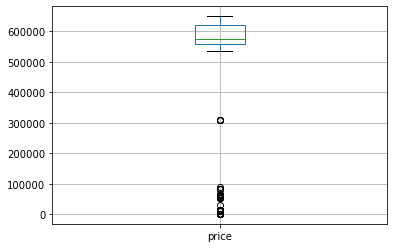

In [77]:
baskets[baskets['sku_id'] == 263].boxplot(column = 'price')

In [78]:
SKU_263 = remove_outliers(baskets[baskets['sku_id'] == 263])

<AxesSubplot:>

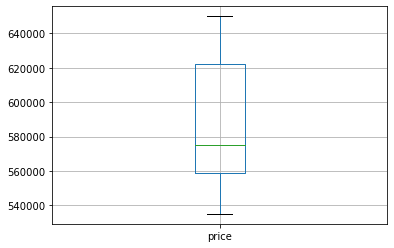

In [79]:
SKU_263.boxplot(column='price')

<AxesSubplot:xlabel='date'>

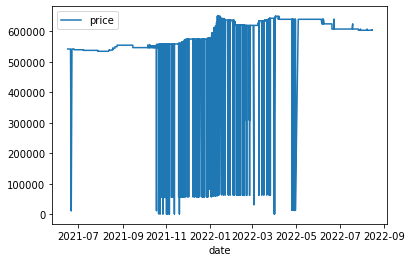

In [80]:
baskets[baskets['sku_id'] == 263].plot(x = 'date', y = 'price')

<AxesSubplot:title={'center':'Price by Data of SKU 263, Outliers Removed'}, xlabel='Date', ylabel='Price(Rp)'>

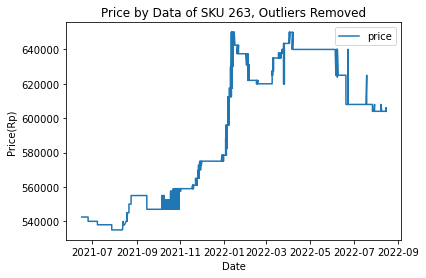

In [81]:
SKU_263.plot(x = 'date', y = 'price', title = 'Price by Data of SKU 263, Outliers Removed', xlabel = 'Date', ylabel = 'Price(Rp)')

Overall, the change in price is not remarkable, as the exchange rate to dollars is so hight, but the difference in graphs is notable. 

For future work:
    - use this new function to plot price by money spent or something else, to demonstrate the importance of finding extraneous data points.

In [82]:
baskets[baskets['sku_id']== 263].price.sum()
baskets[baskets['sku_id'] == 263].price.describe()

count      4548.000000
mean     568506.881424
std      103016.520533
min        1200.000000
25%      557500.000000
50%      575000.000000
75%      620000.000000
max      650000.000000
Name: price, dtype: float64

In [83]:
SKU_263.price.sum()
SKU_263.price.describe()

count      4393.000000
mean     586671.522877
std       34987.305815
min      535000.000000
25%      559000.000000
50%      575000.000000
75%      622000.000000
max      650000.000000
Name: price, dtype: float64

In [84]:
def remove_outliers_qty(in_baskets):
    baskets = in_baskets.copy(deep=True)
    baskets_1Q = baskets.quantile(.25).qty
    baskets_3Q = baskets.quantile(.75).qty
    IQrange = baskets_3Q - baskets_1Q
    upper_fence = baskets_3Q + 3 * IQrange
    lower_fence = baskets_1Q - 3 * IQrange
    baskets.drop(baskets[(baskets['qty'] > upper_fence) | (baskets['qty'] < lower_fence)].index,inplace = True)
    
    return baskets

This function removes outliers in quantity.

In [85]:
SKU_263_qty = remove_outliers_qty(SKU_263)

In [86]:
SKU_263_qty.describe()

,id,order_id,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,year,month,day,hour,weekday,spent
count,4245.000000,4245.000000,4245.000000,4245.0,4245.0,4245.0,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4.245000e+03
mean,149147.832038,25286.479152,737.090224,263.0,4.0,21.0,1.720848,586991.401649,2021.423793,7.548410,15.513781,12.557126,2.536396,1.010515e+06
std,94974.257906,18460.386134,498.730224,0.0,0.0,0.0,1.208301,34904.371299,0.494217,3.914896,8.651032,3.905076,1.810251,7.132153e+05
min,929.000000,62.000000,1.000000,263.0,4.0,21.0,1.000000,535000.000000,2021.000000,1.000000,1.000000,0.000000,0.000000,5.350000e+05
25%,70200.000000,9189.000000,344.000000,263.0,4.0,21.0,1.000000,559000.000000,2021.000000,4.000000,8.000000,10.000000,1.000000,5.610000e+05
50%,136549.000000,21874.000000,664.000000,263.0,4.0,21.0,1.000000,575000.000000,2021.000000,9.000000,15.000000,12.000000,2.000000,6.220000e+05
75%,217971.000000,39372.000000,1080.000000,263.0,4.0,21.0,2.000000,622000.000000,2022.000000,11.000000,23.000000,15.000000,4.000000,1.208000e+06
max,336470.000000,62035.000000,2127.000000,263.0,4.0,21.0,5.000000,650000.000000,2022.000000,12.000000,31.000000,23.000000,6.000000,3.250000e+06


In [87]:
baskets[baskets['sku_id']==263].describe()

,id,order_id,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,year,month,day,hour,weekday,spent
count,4548.000000,4548.000000,4548.000000,4548.0,4548.0,4548.0,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4.548000e+03
mean,148846.138962,25235.666227,730.091029,263.0,4.0,21.0,7.285840,568506.881424,2021.423043,7.530783,15.685796,12.606201,2.538039,1.571123e+06
std,95151.672154,18478.694457,499.153045,0.0,0.0,0.0,42.716877,103016.520533,0.494096,3.912972,8.680280,3.917045,1.805011,4.912304e+06
min,853.000000,62.000000,1.000000,263.0,4.0,21.0,1.000000,1200.000000,2021.000000,1.000000,1.000000,0.000000,0.000000,1.200000e+04
25%,70011.250000,9100.250000,343.000000,263.0,4.0,21.0,1.000000,557500.000000,2021.000000,4.000000,8.000000,10.000000,1.000000,5.650000e+05
50%,136824.500000,21928.500000,650.000000,263.0,4.0,21.0,1.000000,575000.000000,2021.000000,9.000000,15.000000,12.000000,2.000000,6.310000e+05
75%,217963.500000,39368.250000,1062.000000,263.0,4.0,21.0,2.000000,620000.000000,2022.000000,11.000000,23.000000,15.000000,4.000000,1.275000e+06
max,336470.000000,62035.000000,2127.000000,263.0,4.0,21.0,1500.000000,650000.000000,2022.000000,12.000000,31.000000,23.000000,6.000000,1.398800e+08


<AxesSubplot:>

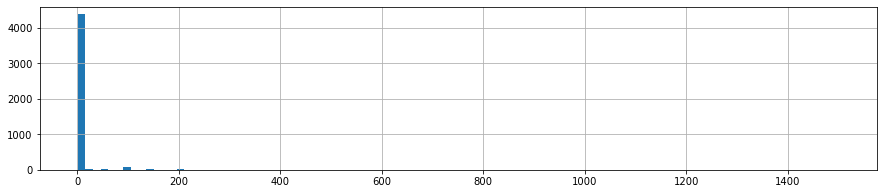

In [88]:
plt.figure(figsize=(15,3)) 
baskets[baskets['sku_id'] == 263].qty.sort_values(ascending = False).reset_index(drop=True).hist(bins=100)

<AxesSubplot:>

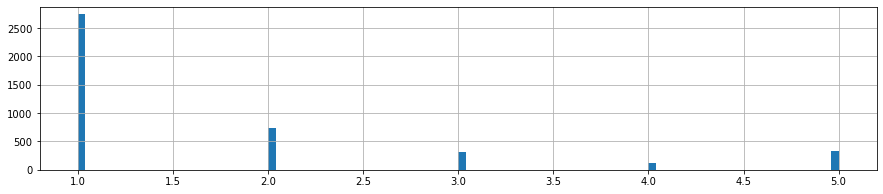

In [89]:
plt.figure(figsize=(15,3)) 
SKU_263_qty.qty.sort_values(ascending = False).reset_index(drop=True).hist(bins=100)

<AxesSubplot:>

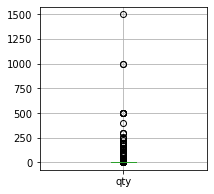

In [90]:
baskets[baskets['sku_id'] == 263].boxplot(column = 'qty', figsize=(3,3))

<AxesSubplot:>

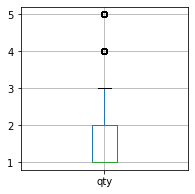

In [91]:
SKU_263_qty.boxplot(column = 'qty', figsize=(3,3))

In [92]:
baskets[baskets['sku_id'] == 263].qty.value_counts()

1       2742
2        734
5        333
3        323
4        117
100       66
6         39
10        37
200       21
7         20
50        19
20        17
8         17
150       14
15         8
500        6
30         6
105        4
300        3
250        2
130        2
1000       2
9          2
140        2
170        1
400        1
32         1
230        1
180        1
17         1
16         1
260        1
148        1
83         1
40         1
1500       1
Name: qty, dtype: int64

In [93]:
baskets[baskets['sku_id'] == 263].spent.describe()

count    4.548000e+03
mean     1.571123e+06
std      4.912304e+06
min      1.200000e+04
25%      5.650000e+05
50%      6.310000e+05
75%      1.275000e+06
max      1.398800e+08
Name: spent, dtype: float64

In [94]:
SKU_263_qty.spent.describe()

count    4.245000e+03
mean     1.010515e+06
std      7.132153e+05
min      5.350000e+05
25%      5.610000e+05
50%      6.220000e+05
75%      1.208000e+06
max      3.250000e+06
Name: spent, dtype: float64

There is a 35% difference between the mean amount spent on SKU 263 before and after outliers are removed.